In [1]:
!pip install numpy 
!pip install pandas 
!pip install matplotlib 
!pip install seaborn
!pip install scipy scikit-learn

In [2]:
# importing  data analysis libraries 
import numpy as np           # For numerical operations
import pandas as pd          # For data manipulation and analysis
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns        # For advanced data visualization
import scipy.stats as stats  # For statistical functions
import sklearn               # For machine learning and data preprocessing
import statsmodels.api as sm # For statistical modeling
import plotly.express as px  # For interactive data visualization
import datetime              # For working with dates and times

In [3]:
# sales data files url
file1 = r"C:\Users\ACER\Desktop\business analysis data\filesss\AdventureWorks_Sales_Data_2020.csv"
file2 = r"C:\Users\ACER\Desktop\business analysis data\filesss\AdventureWorks_Sales_Data_2021.csv"
file3 = r"C:\Users\ACER\Desktop\business analysis data\filesss\AdventureWorks_Sales_Data_2022.csv"
# lookup data files url
file4 = r"C:\Users\ACER\Desktop\business analysis data\filesss\AdventureWorks_Customer_Lookup.csv"
# product data files url
file5 = r"C:\Users\ACER\Desktop\business analysis data\filesss\AdventureWorks_Product_Lookup.csv"
file6 = r"C:\Users\ACER\Desktop\business analysis data\filesss\AdventureWorks_Product_Subcategories_Lookup.csv"
# other data sets files url
file7 = r"C:\Users\ACER\Desktop\business analysis data\filesss\AdventureWorks_Returns_Data.csv"


In [4]:
df_2020 = pd.read_csv(file1)
df_2021 = pd.read_csv(file2)
df_2022 = pd.read_csv(file3)

In [5]:
# Try different encodings until one works
encodings_to_try = ['utf-8', 'ISO-8859-1', 'latin1', 'cp1252']

for encoding in encodings_to_try:
    try:
        df2 = pd.read_csv(file4, encoding=encoding)
        break  # If successful, break out of the loop
    except UnicodeDecodeError:
        continue  # Try the next encoding if there's an error

# Now you can read the other datasets with the same encoding
df_2022 = pd.read_csv(file3, encoding=encoding)
df3 = pd.read_csv(file7, encoding=encoding)
df_product = pd.read_csv(file5, encoding=encoding)
df_pro_cat = pd.read_csv(file6, encoding=encoding)


In [6]:
# check for column consistency for sales datas 
dfs = [df_2020, df_2021, df_2022]
# set a reference column
ref_column = set(dfs[0].columns)
consistent = True
    
for i in dfs[1:]:
    if set(i.columns) != ref_column:
        consistent = False
        break
        
if consistent:
    print('column names are consistent')
    
else:
    print('column names are not consistent')
    

column names are consistent


Now that we have verified that the columns for the sales datas are consistent 
We will proceed to joining the datasets

In [7]:
df = pd.concat(dfs, axis=0, ignore_index=True)
df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,2020-01-01,2019-09-21,SO45080,332,14657,1,1,1
1,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1
2,2020-01-01,2019-10-29,SO45082,350,11455,9,1,1
3,2020-01-01,2019-11-16,SO45081,338,26782,6,1,1
4,2020-01-02,2019-12-15,SO45083,312,14947,10,1,1


In [8]:
df.tail()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
56041,2022-06-30,2022-03-22,SO74143,477,28517,10,3,2
56042,2022-06-30,2022-03-15,SO74143,479,28517,10,2,1
56043,2022-06-30,2022-04-08,SO74143,606,28517,10,1,1
56044,2022-06-30,2022-05-15,SO74124,480,21676,7,2,2
56045,2022-06-30,2022-05-04,SO74124,538,21676,7,1,2


cleaning sales data sets 
let us remove unwanted characters and convert the customer key column to int so we can join 

In [9]:
df.isnull().any()

OrderDate        False
StockDate        False
OrderNumber      False
ProductKey       False
CustomerKey      False
TerritoryKey     False
OrderLineItem    False
OrderQuantity    False
dtype: bool

In [10]:
df3.isnull().any()

ReturnDate        False
TerritoryKey      False
ProductKey        False
ReturnQuantity    False
dtype: bool

In [11]:
df_product.isnull().any()

ProductKey               False
ProductSubcategoryKey    False
ProductSKU               False
ProductName              False
ModelName                False
ProductDescription       False
ProductColor              True
ProductSize              False
ProductStyle             False
ProductCost              False
ProductPrice             False
dtype: bool

In [12]:
df_pro_cat.isnull().any()

ProductSubcategoryKey    False
SubcategoryName          False
ProductCategoryKey       False
dtype: bool

In [13]:
# Check for columns with NaN values
columns_with_nan = df.columns[df.isnull().any()]

# Calculate the extent of missing data in each column
missing_data_percentage = (df[columns_with_nan].isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
missing_data_info = pd.DataFrame({
    'Column Name': columns_with_nan,
    'Missing Values': df[columns_with_nan].isnull().sum(),
    'Percentage': missing_data_percentage
})

# Display the DataFrame
print(missing_data_info)


Empty DataFrame
Columns: [Column Name, Missing Values, Percentage]
Index: []


In [14]:
# Convert the 'CustomerKey' column to string type
df2['CustomerKey'] = df2['CustomerKey'].astype(str)

# Remove unwanted characters ('-') and replace with an empty string
df2['CustomerKey'] = df2['CustomerKey'].str.replace('-', '', regex=True)

# Convert the 'CustomerKey' column back to numeric, handling NaN values
df2['CustomerKey'] = pd.to_numeric(df2['CustomerKey'], errors='coerce')

# Now, you can handle NaN values (e.g., replace with a default value or drop rows)
# For example, you can replace NaN with a default value like -1
df2['CustomerKey'].fillna(-1, inplace=True)  # Replace NaN with -1

# Display the modified DataFrame
df2.head()


,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000.0,MR.,JON,YANG,4/8/1966,M,M,jon24@adventure-works.com,"$90,000.00",2.0,Bachelors,Professional,Y
1,11001.0,MR.,EUGENE,HUANG,5/14/1965,S,M,eugene10@adventure-works.com,"$60,000.00",3.0,Bachelors,Professional,N
2,11002.0,MR.,RUBEN,TORRES,8/12/1965,M,M,ruben35@adventure-works.com,"$60,000.00",3.0,Bachelors,Professional,Y
3,11003.0,MS.,CHRISTY,ZHU,2/15/1968,S,F,christy12@adventure-works.com,"$70,000.00",0.0,Bachelors,Professional,N
4,11004.0,MRS.,ELIZABETH,JOHNSON,8/8/1968,S,F,elizabeth5@adventure-works.com,"$80,000.00",5.0,Bachelors,Professional,Y


In [15]:
df3.head()

,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity
0,2020-01-18,9,312,1
1,2020-01-18,10,310,1
2,2020-01-21,8,346,1
3,2020-01-22,4,311,1
4,2020-02-02,6,312,1


now we merge the the tables using inner joins 

In [16]:
df_merge = pd.merge(df, df3, on = ['TerritoryKey', 'ProductKey'], how='inner')
df_merge.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ReturnDate,ReturnQuantity
0,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2020-05-01,1
1,2020-01-06,2019-12-14,SO45107,312,29275,4,1,1,2020-05-01,1
2,2020-01-12,2019-12-25,SO45141,312,29222,4,1,1,2020-05-01,1
3,2020-01-13,2019-11-28,SO45147,312,29166,4,1,1,2020-05-01,1
4,2020-01-21,2019-11-22,SO45201,312,29168,4,1,1,2020-05-01,1


In [17]:
# Convert the 'CustomerKey' column in df2 to int64 data type
df2['CustomerKey'] = df2['CustomerKey'].astype(int)

# Now, you can perform the merge on 'CustomerKey' since both columns have the same data type
dff = pd.merge(df_merge, df2, on='CustomerKey', how='inner')

# The merged_df dataframe now contains the result of the inner join
dff.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ReturnDate,ReturnQuantity,...,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2020-05-01,1,...,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,"$80,000.00",3.0,Partial College,Professional,N
1,2022-03-14,2021-11-27,SO66195,477,29255,4,3,2,2021-07-11,1,...,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,"$80,000.00",3.0,Partial College,Professional,N
2,2022-03-14,2021-11-27,SO66195,477,29255,4,3,2,2021-08-02,1,...,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,"$80,000.00",3.0,Partial College,Professional,N
3,2022-03-14,2021-11-27,SO66195,477,29255,4,3,2,2021-08-19,2,...,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,"$80,000.00",3.0,Partial College,Professional,N
4,2022-03-14,2021-11-27,SO66195,477,29255,4,3,2,2021-08-23,1,...,WASHINGTON,4/11/1955,S,M,kyle8@adventure-works.com,"$80,000.00",3.0,Partial College,Professional,N


SalesTerritoryKey	Region	    Country	Continent
1	Northwest	United States	North America
2	Northeast	United States	North America
3	Central	    United States	North America
4	Southwest	United States	North America
5	Southeast	United States	North America
6	Canada	    Canada	        North America
7	France	    France	        Europe
8	Germany	    Germany	        Europe
9	Australia	Australia	    Pacific
10	United Kingdom	United Kingdom	Europe

In [18]:
Country_mapping = {1: 'United States',
                  2: 'United States',
                  3: 'United States',
                  4: 'United States',
                  5: 'United States',
                  6: 'Canada',
                  7: 'France',
                  8: 'Germany',
                  9: 'Australia',
                 10: 'United Kingdom'
}

region_mapping = {1: 'Northwest',
                    2: 'Northeast',
                    3: 'Central',
                    4: 'Southwest',
                    5: 'Southeast',
                    6: 'Canada',
                    7: 'France',
                    8: 'Germany',
                    9: 'Australia',
                   10: 'United Kingdom'
}

Continent_mapping = {1: 'North America',
                    2: 'North America',
                    3: 'North America',
                    4: 'North America',
                    5: 'North America',
                    6: 'North America',
                    7: 'Europe',
                    8: 'Europe',
                    9: 'Pacific',
                   10: 'Europe'
}

dff['Sales_Region'] = dff['TerritoryKey'].map(region_mapping)
dff['Sales_Country'] = dff['TerritoryKey'].map(Country_mapping)
dff['Sales_continent'] = dff['TerritoryKey'].map(Continent_mapping)

In [19]:
dff.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ReturnDate,ReturnQuantity,...,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Sales_Region,Sales_Country,Sales_continent
0,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2020-05-01,1,...,M,kyle8@adventure-works.com,"$80,000.00",3.0,Partial College,Professional,N,Southwest,United States,North America
1,2022-03-14,2021-11-27,SO66195,477,29255,4,3,2,2021-07-11,1,...,M,kyle8@adventure-works.com,"$80,000.00",3.0,Partial College,Professional,N,Southwest,United States,North America
2,2022-03-14,2021-11-27,SO66195,477,29255,4,3,2,2021-08-02,1,...,M,kyle8@adventure-works.com,"$80,000.00",3.0,Partial College,Professional,N,Southwest,United States,North America
3,2022-03-14,2021-11-27,SO66195,477,29255,4,3,2,2021-08-19,2,...,M,kyle8@adventure-works.com,"$80,000.00",3.0,Partial College,Professional,N,Southwest,United States,North America
4,2022-03-14,2021-11-27,SO66195,477,29255,4,3,2,2021-08-23,1,...,M,kyle8@adventure-works.com,"$80,000.00",3.0,Partial College,Professional,N,Southwest,United States,North America


# working on the two product datasets 
* we will display the two dataframes to check for common columns 
* the we will proceed to joining the dataframes


In [20]:
df_product.head()

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442
2,218,23,SO-B909-M,"Mountain Bike Socks, M",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,M,U,3.3963,9.5000
3,219,23,SO-B909-L,"Mountain Bike Socks, L",Mountain Bike Socks,Combination of natural and synthetic fibers st...,White,L,U,3.3963,9.5000
4,220,31,HL-U509-B,"Sport-100 Helmet, Blue",Sport-100,"Universal fit, well-vented, lightweight , snap...",Blue,0,0,12.0278,33.6442


In [21]:
df_pro_cat.head()

,ProductSubcategoryKey,SubcategoryName,ProductCategoryKey
0,1,Mountain Bikes,1
1,2,Road Bikes,1
2,3,Touring Bikes,1
3,4,Handlebars,2
4,5,Bottom Brackets,2


now we proceed to joining the two dataframes together using inner joins on productsubcategorykey 

In [22]:
product = pd.merge(df_product, df_pro_cat, on = 'ProductSubcategoryKey', how='inner')
product.head(2)

,ProductKey,ProductSubcategoryKey,ProductSKU,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,ProductCategoryKey
0,214,31,HL-U509-R,"Sport-100 Helmet, Red",Sport-100,"Universal fit, well-vented, lightweight , snap...",Red,0,0,13.0863,34.9900,Helmets,4
1,215,31,HL-U509,"Sport-100 Helmet, Black",Sport-100,"Universal fit, well-vented, lightweight , snap...",Black,0,0,12.0278,33.6442,Helmets,4


In [23]:
dff.head(2)

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ReturnDate,ReturnQuantity,...,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Sales_Region,Sales_Country,Sales_continent
0,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2020-05-01,1,...,M,kyle8@adventure-works.com,"$80,000.00",3.0,Partial College,Professional,N,Southwest,United States,North America
1,2022-03-14,2021-11-27,SO66195,477,29255,4,3,2,2021-07-11,1,...,M,kyle8@adventure-works.com,"$80,000.00",3.0,Partial College,Professional,N,Southwest,United States,North America


now that we have merged this successfully, we will proceed to merge the product and dff dataframe to get a table. then get the product name by mapping it with the product key

In [24]:
df_comb = pd.merge(dff, product, on='ProductKey', how='inner')
df_comb.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ReturnDate,ReturnQuantity,...,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,ProductCategoryKey
0,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2020-05-01,1,...,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.27,Road Bikes,1
1,2020-01-06,2019-12-14,SO45107,312,29275,4,1,1,2020-05-01,1,...,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.27,Road Bikes,1
2,2020-01-12,2019-12-25,SO45141,312,29222,4,1,1,2020-05-01,1,...,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.27,Road Bikes,1
3,2020-01-13,2019-11-28,SO45147,312,29166,4,1,1,2020-05-01,1,...,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.27,Road Bikes,1
4,2020-01-21,2019-11-22,SO45201,312,29168,4,1,1,2020-05-01,1,...,"Road-150 Red, 48",Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.27,Road Bikes,1


In [25]:
# making a dictionary of the production 
production_key = {1 : 'Bikes',
                  2 : 'Components',
                  3 : 'Clothing',
                  4 : 'Accessorie'
}
# we map the product key and saved it in a different column in the dataframe
df_comb['ProductName'] = df_comb['ProductCategoryKey'].map(production_key)

df_comb.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ReturnDate,ReturnQuantity,...,ProductName,ModelName,ProductDescription,ProductColor,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,ProductCategoryKey
0,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2020-05-01,1,...,Bikes,Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.27,Road Bikes,1
1,2020-01-06,2019-12-14,SO45107,312,29275,4,1,1,2020-05-01,1,...,Bikes,Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.27,Road Bikes,1
2,2020-01-12,2019-12-25,SO45141,312,29222,4,1,1,2020-05-01,1,...,Bikes,Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.27,Road Bikes,1
3,2020-01-13,2019-11-28,SO45147,312,29166,4,1,1,2020-05-01,1,...,Bikes,Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.27,Road Bikes,1
4,2020-01-21,2019-11-22,SO45201,312,29168,4,1,1,2020-05-01,1,...,Bikes,Road-150,This bike is ridden by race winners. Developed...,Red,48,U,2171.2942,3578.27,Road Bikes,1


# 2.0 DATA CLEANING PHASE
we proceed to cleaning the data and prepare ot for analysis 

**2.1 HANDLING DUPLICATE**

In [26]:
# let check if there are duplicates in the datasets
duplicates = df_comb.duplicated()
if duplicates.any()== True:
    print('there are duplicates in the data')
else:
    print('no duplicates present in the data')

no duplicates present in the data


now we are sure the dataframe does not contain duplicate values 

**2.2 HANDLING MISSING VALUES**

In [27]:
missing_value = df_comb.isna().sum()
print(missing_value)

OrderDate                     0
StockDate                     0
OrderNumber                   0
ProductKey                    0
CustomerKey                   0
TerritoryKey                  0
OrderLineItem                 0
OrderQuantity                 0
ReturnDate                    0
ReturnQuantity                0
Prefix                     2837
FirstName                     0
LastName                      0
BirthDate                     0
MaritalStatus                 0
Gender                     2837
EmailAddress                  0
AnnualIncome                  0
TotalChildren                 0
EducationLevel                0
Occupation                    0
HomeOwner                     0
Sales_Region                  0
Sales_Country                 0
Sales_continent               0
ProductSubcategoryKey         0
ProductSKU                    0
ProductName                   0
ModelName                     0
ProductDescription            0
ProductColor             312041
ProductS

In [28]:
df_comb.shape

(424467, 37)

In [29]:
percentage_missing = (df_comb.isna().mean() * 100).round(2)

# Print the percentage of missing values for each column
print("Percentage of Missing Values per Column:")
print(percentage_missing)

Percentage of Missing Values per Column:
OrderDate                 0.00
StockDate                 0.00
OrderNumber               0.00
ProductKey                0.00
CustomerKey               0.00
TerritoryKey              0.00
OrderLineItem             0.00
OrderQuantity             0.00
ReturnDate                0.00
ReturnQuantity            0.00
Prefix                    0.67
FirstName                 0.00
LastName                  0.00
BirthDate                 0.00
MaritalStatus             0.00
Gender                    0.67
EmailAddress              0.00
AnnualIncome              0.00
TotalChildren             0.00
EducationLevel            0.00
Occupation                0.00
HomeOwner                 0.00
Sales_Region              0.00
Sales_Country             0.00
Sales_continent           0.00
ProductSubcategoryKey     0.00
ProductSKU                0.00
ProductName               0.00
ModelName                 0.00
ProductDescription        0.00
ProductColor             73.5

There are obviously 3 columns with missing values, the columns with missing values are Gender, prefix, and productcolor with percentage missing values of 0.67%, 0.67% and 73.51% respectively. 
we would handle these by droping the rows with the mising values since the percentage is small 
then we will drop the productcolour column since the missing values are very large. 

In [30]:
# dropping the product colour coludf_comb['ProductColor'].drop()
df_comb.drop('ProductColor', axis=1, inplace=True)
df_comb.head(3)

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ReturnDate,ReturnQuantity,...,ProductSKU,ProductName,ModelName,ProductDescription,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,ProductCategoryKey
0,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2020-05-01,1,...,BK-R93R-48,Bikes,Road-150,This bike is ridden by race winners. Developed...,48,U,2171.2942,3578.27,Road Bikes,1
1,2020-01-06,2019-12-14,SO45107,312,29275,4,1,1,2020-05-01,1,...,BK-R93R-48,Bikes,Road-150,This bike is ridden by race winners. Developed...,48,U,2171.2942,3578.27,Road Bikes,1
2,2020-01-12,2019-12-25,SO45141,312,29222,4,1,1,2020-05-01,1,...,BK-R93R-48,Bikes,Road-150,This bike is ridden by race winners. Developed...,48,U,2171.2942,3578.27,Road Bikes,1


now we proceed to drop the rows missing values 

In [31]:
# drop missing values 
df_comb.dropna(inplace=True)

In [32]:
# checking for missing values 
nan_value = df_comb.isna().sum()
print(nan_value)

OrderDate                0
StockDate                0
OrderNumber              0
ProductKey               0
CustomerKey              0
TerritoryKey             0
OrderLineItem            0
OrderQuantity            0
ReturnDate               0
ReturnQuantity           0
Prefix                   0
FirstName                0
LastName                 0
BirthDate                0
MaritalStatus            0
Gender                   0
EmailAddress             0
AnnualIncome             0
TotalChildren            0
EducationLevel           0
Occupation               0
HomeOwner                0
Sales_Region             0
Sales_Country            0
Sales_continent          0
ProductSubcategoryKey    0
ProductSKU               0
ProductName              0
ModelName                0
ProductDescription       0
ProductSize              0
ProductStyle             0
ProductCost              0
ProductPrice             0
SubcategoryName          0
ProductCategoryKey       0
dtype: int64


In [33]:
df_comb.shape

(421630, 36)

**HANDLING COLUMN/DATA TYPE ISSUES**
Now that we are sure that our data does not have duplicates and does not contain missing values, we will proceed to check the data types for each, to know if it is consistent with the data in that column

In [34]:
# check the column types
df_comb.dtypes

OrderDate                 object
StockDate                 object
OrderNumber               object
ProductKey                 int64
CustomerKey                int64
TerritoryKey               int64
OrderLineItem              int64
OrderQuantity              int64
ReturnDate                object
ReturnQuantity             int64
Prefix                    object
FirstName                 object
LastName                  object
BirthDate                 object
MaritalStatus             object
Gender                    object
EmailAddress              object
AnnualIncome              object
TotalChildren            float64
EducationLevel            object
Occupation                object
HomeOwner                 object
Sales_Region              object
Sales_Country             object
Sales_continent           object
ProductSubcategoryKey      int64
ProductSKU                object
ProductName               object
ModelName                 object
ProductDescription        object
ProductSiz

In [35]:
df_comb.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity,ReturnDate,ReturnQuantity,...,ProductSKU,ProductName,ModelName,ProductDescription,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,ProductCategoryKey
0,2020-01-01,2019-12-05,SO45079,312,29255,4,1,1,2020-05-01,1,...,BK-R93R-48,Bikes,Road-150,This bike is ridden by race winners. Developed...,48,U,2171.2942,3578.27,Road Bikes,1
1,2020-01-06,2019-12-14,SO45107,312,29275,4,1,1,2020-05-01,1,...,BK-R93R-48,Bikes,Road-150,This bike is ridden by race winners. Developed...,48,U,2171.2942,3578.27,Road Bikes,1
2,2020-01-12,2019-12-25,SO45141,312,29222,4,1,1,2020-05-01,1,...,BK-R93R-48,Bikes,Road-150,This bike is ridden by race winners. Developed...,48,U,2171.2942,3578.27,Road Bikes,1
3,2020-01-13,2019-11-28,SO45147,312,29166,4,1,1,2020-05-01,1,...,BK-R93R-48,Bikes,Road-150,This bike is ridden by race winners. Developed...,48,U,2171.2942,3578.27,Road Bikes,1
4,2020-01-21,2019-11-22,SO45201,312,29168,4,1,1,2020-05-01,1,...,BK-R93R-48,Bikes,Road-150,This bike is ridden by race winners. Developed...,48,U,2171.2942,3578.27,Road Bikes,1


Now we will change all the date columns to date format

In [36]:
# changing date format
column_to_change = ['OrderDate', 'StockDate', 'ReturnDate']
for column in column_to_change:
    df_comb[column] = pd.to_datetime(df_comb[column])
    
print(df_comb.dtypes)

OrderDate                datetime64[ns]
StockDate                datetime64[ns]
OrderNumber                      object
ProductKey                        int64
CustomerKey                       int64
TerritoryKey                      int64
OrderLineItem                     int64
OrderQuantity                     int64
ReturnDate               datetime64[ns]
ReturnQuantity                    int64
Prefix                           object
FirstName                        object
LastName                         object
BirthDate                        object
MaritalStatus                    object
Gender                           object
EmailAddress                     object
AnnualIncome                     object
TotalChildren                   float64
EducationLevel                   object
Occupation                       object
HomeOwner                        object
Sales_Region                     object
Sales_Country                    object
Sales_continent                  object


our columns now have the right column type and format, we proceed to 

In [37]:
# let rename column 
df_comb.rename(columns= {'OrderDate':'SalesDate'}, inplace=True)

check for the unique values in each columns 

In [38]:
df_comb.nunique()

SalesDate                  906
StockDate                  983
OrderNumber              23158
ProductKey                 124
CustomerKey              16911
TerritoryKey                 8
OrderLineItem                8
OrderQuantity                3
ReturnDate                 476
ReturnQuantity               2
Prefix                       3
FirstName                  658
LastName                   356
BirthDate                 7986
MaritalStatus                2
Gender                       2
EmailAddress             16911
AnnualIncome                16
TotalChildren                6
EducationLevel               5
Occupation                   5
HomeOwner                    2
Sales_Region                 8
Sales_Country                6
Sales_continent              3
ProductSubcategoryKey       17
ProductSKU                 124
ProductName                  3
ModelName                   40
ProductDescription          40
ProductSize                 19
ProductStyle                 3
ProductC

In [39]:
# now i will drop some columns 
column_to_drop = ['ProductCategoryKey', 'TerritoryKey', 'ProductDescription', 'EmailAddress', 'ProductSKU']
df_comb.drop(column_to_drop, axis=1, inplace=True)
df_comb.head()

,SalesDate,StockDate,OrderNumber,ProductKey,CustomerKey,OrderLineItem,OrderQuantity,ReturnDate,ReturnQuantity,Prefix,...,Sales_Country,Sales_continent,ProductSubcategoryKey,ProductName,ModelName,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName
0,2020-01-01,2019-12-05,SO45079,312,29255,1,1,2020-05-01,1,MR.,...,United States,North America,2,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes
1,2020-01-06,2019-12-14,SO45107,312,29275,1,1,2020-05-01,1,MRS.,...,United States,North America,2,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes
2,2020-01-12,2019-12-25,SO45141,312,29222,1,1,2020-05-01,1,MR.,...,United States,North America,2,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes
3,2020-01-13,2019-11-28,SO45147,312,29166,1,1,2020-05-01,1,MR.,...,United States,North America,2,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes
4,2020-01-21,2019-11-22,SO45201,312,29168,1,1,2020-05-01,1,MR.,...,United States,North America,2,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes


**PERFORM CALCULATIONS**
Now we will add some columns 
* calculate the sales profits
* calculate the duration eact item stayed instock as Duration_in_stock
* calculate how long it takes for customers return unwanted products as return_duration

In [40]:
df_comb.head()

,SalesDate,StockDate,OrderNumber,ProductKey,CustomerKey,OrderLineItem,OrderQuantity,ReturnDate,ReturnQuantity,Prefix,...,Sales_Country,Sales_continent,ProductSubcategoryKey,ProductName,ModelName,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName
0,2020-01-01,2019-12-05,SO45079,312,29255,1,1,2020-05-01,1,MR.,...,United States,North America,2,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes
1,2020-01-06,2019-12-14,SO45107,312,29275,1,1,2020-05-01,1,MRS.,...,United States,North America,2,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes
2,2020-01-12,2019-12-25,SO45141,312,29222,1,1,2020-05-01,1,MR.,...,United States,North America,2,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes
3,2020-01-13,2019-11-28,SO45147,312,29166,1,1,2020-05-01,1,MR.,...,United States,North America,2,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes
4,2020-01-21,2019-11-22,SO45201,312,29168,1,1,2020-05-01,1,MR.,...,United States,North America,2,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes


In [41]:
# sales profits
df_comb['Sales_profit'] = (df_comb['ProductPrice'] - df_comb['ProductCost']).astype(float)
df_comb['Duration_in_stock'] = (df_comb['SalesDate'] - df_comb['StockDate']).dt.total_seconds() / 3600 #converting to hours 
df_comb['return_duration'] = (df_comb['ReturnDate'] - df_comb['SalesDate']).dt.total_seconds() / 3600 # converting to hours 
#displaying the data sets 
df_comb.head()

,SalesDate,StockDate,OrderNumber,ProductKey,CustomerKey,OrderLineItem,OrderQuantity,ReturnDate,ReturnQuantity,Prefix,...,ProductName,ModelName,ProductSize,ProductStyle,ProductCost,ProductPrice,SubcategoryName,Sales_profit,Duration_in_stock,return_duration
0,2020-01-01,2019-12-05,SO45079,312,29255,1,1,2020-05-01,1,MR.,...,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes,1406.9758,648.0,2904.0
1,2020-01-06,2019-12-14,SO45107,312,29275,1,1,2020-05-01,1,MRS.,...,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes,1406.9758,552.0,2784.0
2,2020-01-12,2019-12-25,SO45141,312,29222,1,1,2020-05-01,1,MR.,...,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes,1406.9758,432.0,2640.0
3,2020-01-13,2019-11-28,SO45147,312,29166,1,1,2020-05-01,1,MR.,...,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes,1406.9758,1104.0,2616.0
4,2020-01-21,2019-11-22,SO45201,312,29168,1,1,2020-05-01,1,MR.,...,Bikes,Road-150,48,U,2171.2942,3578.27,Road Bikes,1406.9758,1440.0,2424.0


Now we will extract some columns from the salesdate column
some column we will exxtract are:
* year column
* sales_months name column
* sales_day_of_week column

In [42]:
# for year column
df_comb['SalesYear'] = df_comb['SalesDate'].dt.year

# for sales months name 
df_comb['sales_month'] = df_comb['SalesDate'].dt.strftime('%B')

# for sales day of the week name 
df_comb['sales_day'] = df_comb['SalesDate'].dt.strftime('%A')

df_comb.head()

,SalesDate,StockDate,OrderNumber,ProductKey,CustomerKey,OrderLineItem,OrderQuantity,ReturnDate,ReturnQuantity,Prefix,...,ProductStyle,ProductCost,ProductPrice,SubcategoryName,Sales_profit,Duration_in_stock,return_duration,SalesYear,sales_month,sales_day
0,2020-01-01,2019-12-05,SO45079,312,29255,1,1,2020-05-01,1,MR.,...,U,2171.2942,3578.27,Road Bikes,1406.9758,648.0,2904.0,2020,January,Wednesday
1,2020-01-06,2019-12-14,SO45107,312,29275,1,1,2020-05-01,1,MRS.,...,U,2171.2942,3578.27,Road Bikes,1406.9758,552.0,2784.0,2020,January,Monday
2,2020-01-12,2019-12-25,SO45141,312,29222,1,1,2020-05-01,1,MR.,...,U,2171.2942,3578.27,Road Bikes,1406.9758,432.0,2640.0,2020,January,Sunday
3,2020-01-13,2019-11-28,SO45147,312,29166,1,1,2020-05-01,1,MR.,...,U,2171.2942,3578.27,Road Bikes,1406.9758,1104.0,2616.0,2020,January,Monday
4,2020-01-21,2019-11-22,SO45201,312,29168,1,1,2020-05-01,1,MR.,...,U,2171.2942,3578.27,Road Bikes,1406.9758,1440.0,2424.0,2020,January,Tuesday


In [43]:
df_comb.dtypes

SalesDate                datetime64[ns]
StockDate                datetime64[ns]
OrderNumber                      object
ProductKey                        int64
CustomerKey                       int64
OrderLineItem                     int64
OrderQuantity                     int64
ReturnDate               datetime64[ns]
ReturnQuantity                    int64
Prefix                           object
FirstName                        object
LastName                         object
BirthDate                        object
MaritalStatus                    object
Gender                           object
AnnualIncome                     object
TotalChildren                   float64
EducationLevel                   object
Occupation                       object
HomeOwner                        object
Sales_Region                     object
Sales_Country                    object
Sales_continent                  object
ProductSubcategoryKey             int64
ProductName                      object


**2.4 SUMMARY TABLE **

In [44]:
# Group by year, month, and day of the week and aggregate sales profits
summary_table_year = df_comb.groupby('SalesYear')['Sales_profit'].sum().reset_index()
summary_table_month = df_comb.groupby(['SalesYear', 'sales_month'])['Sales_profit'].sum().reset_index()
summary_table_day_of_week = df_comb.groupby(['SalesYear', 'sales_day'])['Sales_profit'].sum().reset_index()

# Rename columns for clarity
summary_table_year.columns = ['SalesYear', 'Total_Sales_Profit']
summary_table_month.columns = ['SalesYear', 'sales_month', 'Total_Sales_Profit']
summary_table_day_of_week.columns = ['SalesYear', 'sales_day', 'Total_Sales_Profit']


In [45]:
# Display the YEARLY summary tables
print("Summary Table by Year:")
summary_table_year



Summary Table by Year:


,SalesYear,Total_Sales_Profit
0,2020,3.576893e+06
1,2021,8.966235e+06
2,2022,8.162666e+06


# ANALYSIS AND VISUALIZATIONS 

we will drop our visualizations and analysis into 4 groups.
* SALES OVERVIEW 
* PRODUCT ANALYSIS
* CUSTOMER AND RETURN ANALYSIS
* GEOGRAPHICAL AND TIME ANALYSIS

# SALES ANALYSIS 
We will create the following visualizations 
* Monthly Sales Trend: Line chart showing monthly sales over the years.
* Sales by Category: Stacked bar chart showing sales by product categories.
* Sales by Region: Bar chart showing sales by regions.

<Figure size 800x800 with 0 Axes>

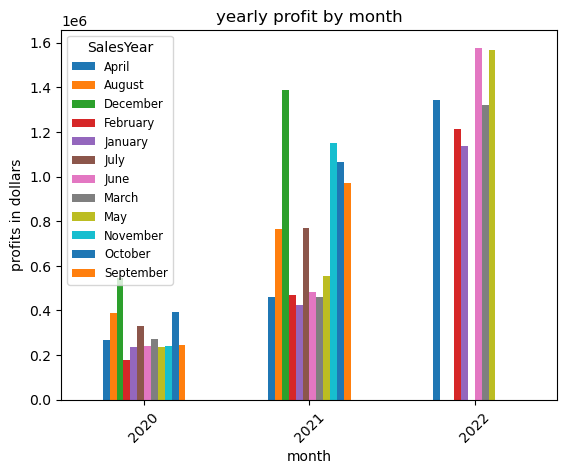

In [46]:
# Monthly Sales Trend: Line chart showing monthly sales over the years.
pivot_table = df_comb.pivot_table(index='SalesYear', columns='sales_month', values='Sales_profit', aggfunc='sum')

# create a combined bar plot
plt.figure(figsize=(8, 8))
pivot_table.plot(kind='bar', stacked=False)
plt.title('yearly profit by month')
plt.xlabel('month')
plt.ylabel('profits in dollars')
plt.xticks(rotation=45)
plt.legend(title= 'SalesYear', loc='upper left', fontsize='small')
plt.show()

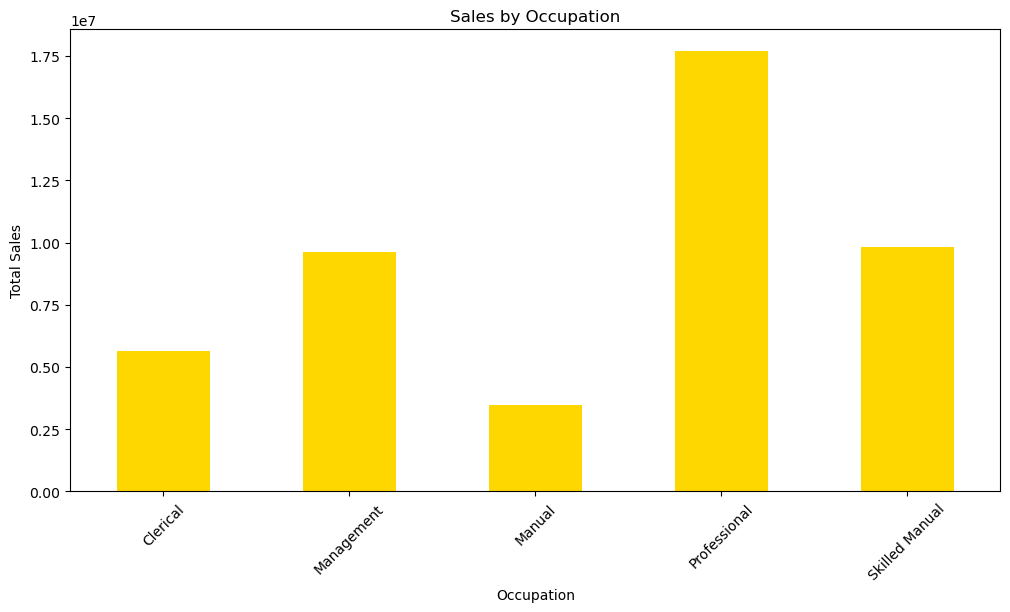

In [47]:
# Grouping data by Occupation and calculating total sales
occupation_sales = df_comb.groupby('Occupation')['ProductPrice'].sum()

# Creating a bar chart
plt.figure(figsize=(12, 6))
occupation_sales.plot(kind='bar', color='gold')
plt.title('Sales by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()



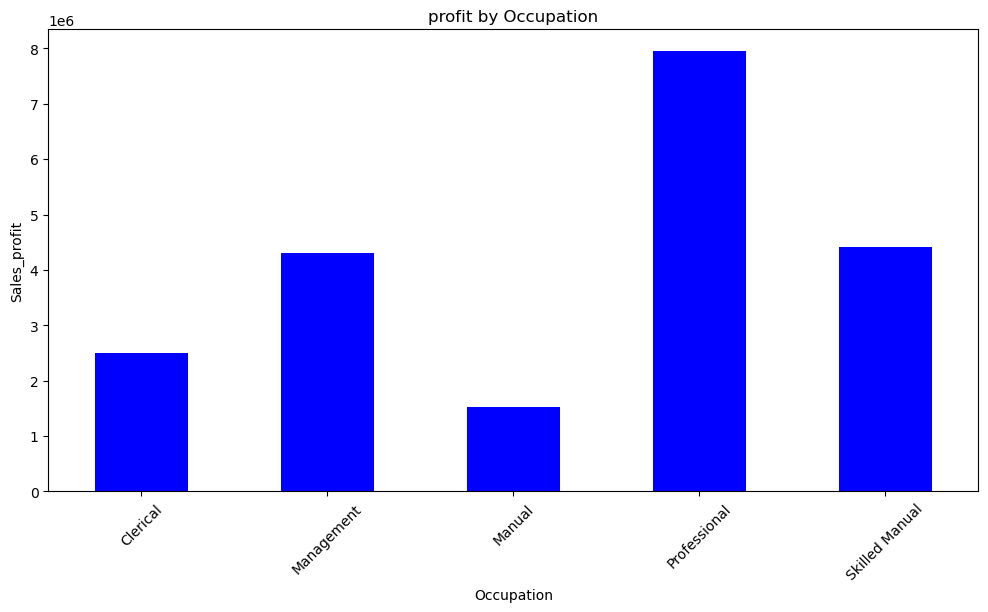

In [48]:
# Grouping data by Occupation and calculating total sales
occupation_sales = df_comb.groupby('Occupation')['Sales_profit'].sum()

# Creating a bar chart
plt.figure(figsize=(12, 6))
occupation_sales.plot(kind='bar', color='blue')
plt.title('profit by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Sales_profit')
plt.xticks(rotation=45)

plt.show()


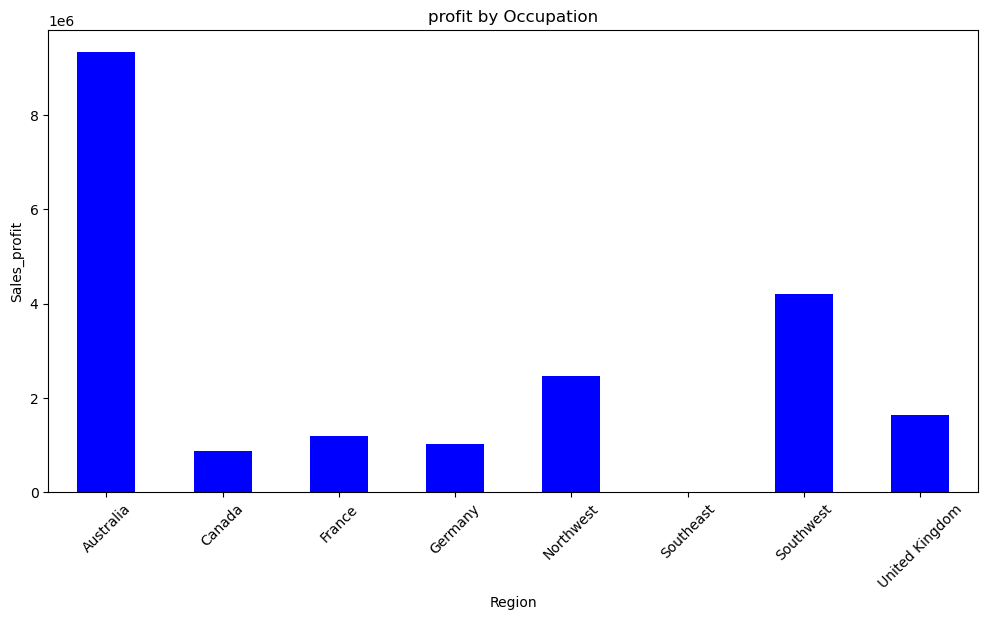

In [49]:
# Grouping data by Occupation and calculating total sales
occupation_sales = df_comb.groupby('Sales_Region')['Sales_profit'].sum()

# Creating a bar chart
plt.figure(figsize=(12, 6))
occupation_sales.plot(kind='bar', color='blue')
plt.title('profit by Occupation')
plt.xlabel('Region')
plt.ylabel('Sales_profit')
plt.xticks(rotation=45)

plt.show()


In [50]:
# Specify the file path where you want to save the CSV file
file_path = r"C:\Users\ACER\business_data_cleaned\New folder.csv"
# Save the DataFrame to the specified file path
df_comb.to_csv(file_path, index=False)
